<a href="https://colab.research.google.com/github/RinGoku/Kaggle-Titanic-ML/blob/master/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# トレーニングデータ読込(性別をコード化)
df= pd.read_csv("train.csv").replace("male",0).replace("female",1)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

客室のグレード

([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

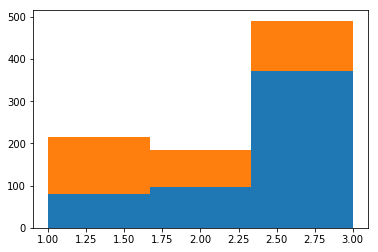

In [3]:
df["Age"].fillna(df.Age.median(), inplace=True)
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

年齢ヒストグラム

([array([ 13.,  13.,   8.,  63.,  80., 191.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([ 44.,  20.,  19.,  96., 122., 285.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

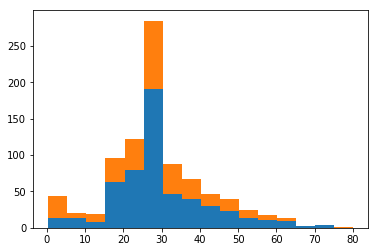

In [4]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

データ整形

In [37]:
# 家族人数 = 同情している兄弟/配偶者の数 + 同乗している親/子供の数 + 本人
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
# 整形後のデータ
# df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)

print(df2)

     PassengerId  Survived  Pclass  Sex   Age      Fare  FamilySize
0              1         0       3    0  22.0    7.2500           2
1              2         1       1    1  38.0   71.2833           2
2              3         1       3    1  26.0    7.9250           1
3              4         1       1    1  35.0   53.1000           2
4              5         0       3    0  35.0    8.0500           1
5              6         0       3    0   NaN    8.4583           1
6              7         0       1    0  54.0   51.8625           1
7              8         0       3    0   2.0   21.0750           5
8              9         1       3    1  27.0   11.1333           3
9             10         1       2    1  14.0   30.0708           2
10            11         1       3    1   4.0   16.7000           3
11            12         1       1    1  58.0   26.5500           1
12            13         0       3    0  20.0    8.0500           1
13            14         0       3    0  39.0   

学習

In [0]:
train_data = df2.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)

test_df= pd.read_csv("test.csv").replace("male",0).replace("female",1)
# 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["Fare"].fillna(df.Fare.median(), inplace=True)
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
# test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)
print(test_df2)

     PassengerId  Pclass  Sex   Age      Fare  FamilySize
0            892       3    0  34.5    7.8292           1
1            893       3    1  47.0    7.0000           2
2            894       2    0  62.0    9.6875           1
3            895       3    0  27.0    8.6625           1
4            896       3    1  22.0   12.2875           3
5            897       3    0  14.0    9.2250           1
6            898       3    1  30.0    7.6292           1
7            899       2    0  26.0   29.0000           3
8            900       3    1  18.0    7.2292           1
9            901       3    0  21.0   24.1500           3
10           902       3    0  28.0    7.8958           1
11           903       1    0  46.0   26.0000           1
12           904       1    1  23.0   82.2667           2
13           905       2    0  63.0   26.0000           2
14           906       1    1  47.0   61.1750           2
15           907       2    1  24.0   27.7208           2
16           9

In [32]:
test_data = test_df2.values
xs_test = test_data[:, 1:]
output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

418 418


In [0]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])